# Quantitative Fundamental Analysis 1

Fundamental analysis (FA) is a method of measuring a security's intrinsic value by examining related economic and financial factors. Fundamental analysts study anything that can affect the security's value, from macroeconomic factors such as the state of the economy and industry conditions to microeconomic factors like the effectiveness of the company's management.The end goal is to arrive at a number that an investor can compare with a security's current price in order to see whether the security is undervalued or overvalued.

This method of stock analysis is considered to be in contrast to technical analysis, which forecasts the direction of prices through an analysis of historical market data such as price and volume.

## Quantitative FA

Quantitative fundamentals are hard numbers. They are the measurable characteristics of a business. That's why the biggest source of quantitative data is financial statements. Revenue, profit, assets, and more can be measured with great precision.

In [63]:
# Importing Library necessary for the project
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=5, suppress=True,formatter={'float': lambda x: f'{x:6.3f}'})
import yfinance as yf

C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\3249399084.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Now lets scrape wikipedia page to get all the ticker symbols of Dow Jones Industrial Average

In [90]:
df = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]
df

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,1.54%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.64%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.80%
3,Amazon,NASDAQ,AMZN,Retailing,2024-02-26,NaN,2.93%
4,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.04%
5,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.36%
6,Caterpillar,NYSE,CAT,Construction and mining,1991-05-06,NaN,5.45%
7,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,2.59%
8,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.81%
9,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.02%


There are 30 stocks in the index and their respective tickers are listed which we are interest in.

In [65]:
tickers = df.Symbol.to_list() + ["TSLA", "UPWK", "ORCL", "NFLX", "AAPL"]
tickers = list(set(tickers))
tickers

['ORCL',
 'TSLA',
 'CSCO',
 'AAPL',
 'VZ',
 'AMZN',
 'UPWK',
 'IBM',
 'MSFT',
 'AXP',
 'KO',
 'JPM',
 'BA',
 'TRV',
 'NKE',
 'CAT',
 'MCD',
 'V',
 'DOW',
 'MMM',
 'GS',
 'UNH',
 'NFLX',
 'CRM',
 'PG',
 'DIS',
 'AMGN',
 'WMT',
 'HON',
 'MRK',
 'HD',
 'CVX',
 'JNJ',
 'INTC']

Lets get fundamental information on these stocks using yahoofinance.

In [66]:
infos = []
for tick in tickers:
    infos.append(yf.Ticker(tick).info)

infos = pd.DataFrame(infos)

In [67]:
infos = infos.set_index('symbol')
infos

,address1,city,state,zip,country,phone,website,industry,industryKey,industryDisp,...,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio,fax,address2,industrySymbol
symbol,,,,,,,,,,,,,,,,,,,,,
ORCL,2300 Oracle Way,Austin,TX,78741,United States,737-867-1000,https://www.oracle.com,Software - Infrastructure,software-infrastructure,Software - Infrastructure,...,0.413,0.054,0.71880,0.39331,0.28769,USD,1.1699,NaN,NaN,NaN
TSLA,1 Tesla Road,Austin,TX,78725,United States,512 516 8177,https://www.tesla.com,Auto Manufacturers,auto-manufacturers,Auto Manufacturers,...,1.115,0.035,0.18249,0.14010,0.08201,USD,2.0559,NaN,NaN,NaN
CSCO,170 West Tasman Drive,San Jose,CA,95134-1706,United States,(408) 526-4000,https://www.cisco.com,Communication Equipment,communication-equipment,Communication Equipment,...,-0.031,-0.059,0.64218,0.30876,0.24298,USD,3.5770,(408) 853-3683,NaN,NaN
AAPL,One Apple Park Way,Cupertino,CA,95014,United States,408 996 1010,https://www.apple.com,Consumer Electronics,consumer-electronics,Consumer Electronics,...,0.160,0.021,0.45027,0.33733,0.33764,USD,2.1016,NaN,NaN,NaN
VZ,1095 Avenue of the Americas,New York,NY,10036,United States,212 395 1000,https://www.verizon.com,Telecom Services,telecom-services,Telecom Services,...,NaN,-0.003,0.59093,0.35731,0.20424,USD,1.0872,NaN,NaN,NaN
AMZN,410 Terry Avenue North,Seattle,WA,98109-5210,United States,206 266 1000,https://www.aboutamazon.com,Internet Retail,internet-retail,Internet Retail,...,50.693,0.139,0.46982,0.14878,0.07525,USD,2.3708,NaN,NaN,NaN
UPWK,475 Brannan Street,San Francisco,CA,94107,United States,650 316 7500,https://www.upwork.com,Staffing & Employment Services,staffing-employment-services,Staffing & Employment Services,...,NaN,0.139,0.75266,-0.01206,0.03223,USD,NaN,NaN,Suite 430,NaN
IBM,One New Orchard Road,Armonk,NY,10504,United States,914 499 1900,https://www.ibm.com,Information Technology Services,information-technology-services,Information Technology Services,...,0.200,0.041,0.55448,0.23102,0.23170,USD,4.5238,NaN,NaN,NaN
MSFT,One Microsoft Way,Redmond,WA,98052-6399,United States,425 882 8080,https://www.microsoft.com,Software - Infrastructure,software-infrastructure,Software - Infrastructure,...,0.332,0.176,0.69815,0.52037,0.43586,USD,2.0600,NaN,NaN,NaN


Now we have the basic fundamental data about the stocks in the DOW jones industrial average. Lets figure out the columns that are interesting for analysis.

In [68]:
for col in infos.columns:
    print(col)

address1
city
state
zip
country
phone
website
industry
industryKey
industryDisp
sector
sectorKey
sectorDisp
longBusinessSummary
fullTimeEmployees
companyOfficers
auditRisk
boardRisk
compensationRisk
shareHolderRightsRisk
overallRisk
governanceEpochDate
compensationAsOfEpochDate
maxAge
priceHint
previousClose
open
dayLow
dayHigh
regularMarketPreviousClose
regularMarketOpen
regularMarketDayLow
regularMarketDayHigh
dividendRate
dividendYield
exDividendDate
payoutRatio
fiveYearAvgDividendYield
beta
trailingPE
forwardPE
volume
regularMarketVolume
averageVolume
averageVolume10days
averageDailyVolume10Day
bid
ask
bidSize
askSize
marketCap
fiftyTwoWeekLow
fiftyTwoWeekHigh
priceToSalesTrailing12Months
fiftyDayAverage
twoHundredDayAverage
trailingAnnualDividendRate
trailingAnnualDividendYield
currency
enterpriseValue
profitMargins
floatShares
sharesOutstanding
sharesShort
sharesShortPriorMonth
sharesShortPreviousMonthDate
dateShortInterest
sharesPercentSharesOut
heldPercentInsiders
heldPercentIn

In [69]:
fundamental = ['industry','operatingCashflow','ebitda','freeCashflow','pegRatio','earningsGrowth', 'currentRatio','debtToEquity','returnOnEquity','totalCash','totalDebt','quickRatio','beta3Year','beta','forwardEps','priceToBook','priceToSalesTrailing12Months','forwardPE','dividendRate','trailingPE','marketCap','dividendYield']
#lets filter out the fundamental data 
fund_info = infos[infos.columns[infos.columns.isin(fundamental)]]
fund_info

,industry,dividendRate,dividendYield,beta,trailingPE,forwardPE,marketCap,priceToSalesTrailing12Months,priceToBook,forwardEps,...,totalCash,ebitda,totalDebt,quickRatio,currentRatio,debtToEquity,returnOnEquity,freeCashflow,operatingCashflow,earningsGrowth
symbol,,,,,,,,,,,,,,,,,,,,,
ORCL,Software - Infrastructure,1.60,0.0142,0.994,31.569061,20.119719,314146586624,6.084810,81.222460,5.68,...,8689999872,2.030600e+10,88789000192,0.635,0.790,2028.072,33.677740,1.033600e+10,17038999552,0.413
TSLA,Auto Manufacturers,NaN,NaN,2.415,41.562790,47.031578,569185665024,5.881658,9.088227,3.80,...,29094000640,1.355800e+10,9573000192,1.141,1.726,15.050,0.273480,2.230375e+09,13255999488,1.115
CSCO,Communication Equipment,1.60,0.0323,0.853,15.223404,13.180264,202803675136,3.543475,4.385726,3.80,...,26233999360,1.767100e+10,12656000000,1.121,1.365,27.364,0.306460,1.375288e+10,14364000256,-0.031
AAPL,Consumer Electronics,0.96,0.0056,1.289,26.758540,24.067738,2661025316864,6.899103,35.953472,7.16,...,73100001280,1.301090e+11,108040003584,0.920,1.073,145.803,1.542690,8.656313e+10,116433002496,0.160
VZ,Telecom Services,2.66,0.0673,0.384,14.598182,8.541490,168780431360,1.259800,1.826018,4.70,...,2064999936,4.787000e+10,178597003264,0.510,0.692,190.404,0.129870,9.450375e+09,37475000320,NaN
AMZN,Internet Retail,NaN,NaN,1.171,59.674667,33.165344,1791408734208,3.116659,8.870019,5.20,...,86780002304,8.551500e+10,161573994496,0.807,1.045,80.037,0.174900,4.547575e+10,84946001920,50.693
UPWK,Staffing & Employment Services,NaN,NaN,1.674,215.833330,13.631578,1779239168,2.581841,4.664986,0.95,...,550097984,-8.311000e+06,367862016,2.229,3.015,96.533,0.148860,2.214250e+07,27221000,NaN
IBM,Information Technology Services,6.64,0.0339,0.708,23.575706,19.747380,176145219584,2.847482,7.802404,9.73,...,13441000448,1.429100e+10,59934998528,0.817,0.964,265.047,0.336690,1.081800e+10,13930999808,0.200
MSFT,Software - Infrastructure,3.00,0.0074,0.890,36.601810,33.151640,3005241622528,13.205035,12.615409,12.20,...,80981999616,1.184270e+11,111358001152,1.096,1.218,46.736,0.391740,5.868100e+10,102646996992,0.332


Now we are ready to compare stocks in DOW JONES based on their fundamental data.

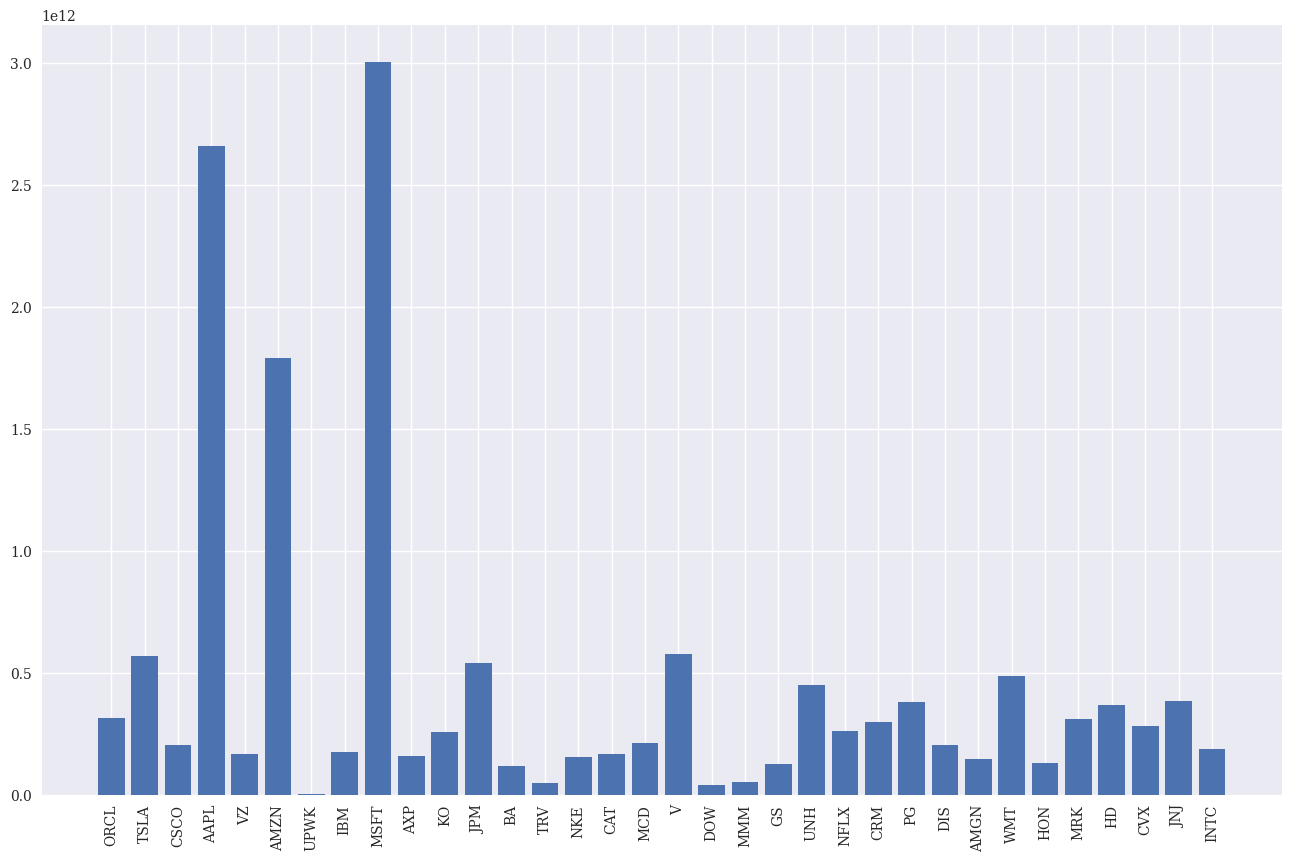

In [70]:
#First let plot out the companies with the biggest market cap
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['marketCap'])
plt.xticks(rotation = 90)
plt.show()

In [71]:
fund_info['marketCap'].nlargest(10)

symbol
MSFT    3005241622528
AAPL    2661025316864
AMZN    1791408734208
V        575694176256
TSLA     569185665024
JPM      539666120704
WMT      486501253120
UNH      450580578304
JNJ      386463072256
PG       380106833920
Name: marketCap, dtype: int64

As suspected technology stocks are the top 2 then healthcare dominates which is also not suprising given the past few years.

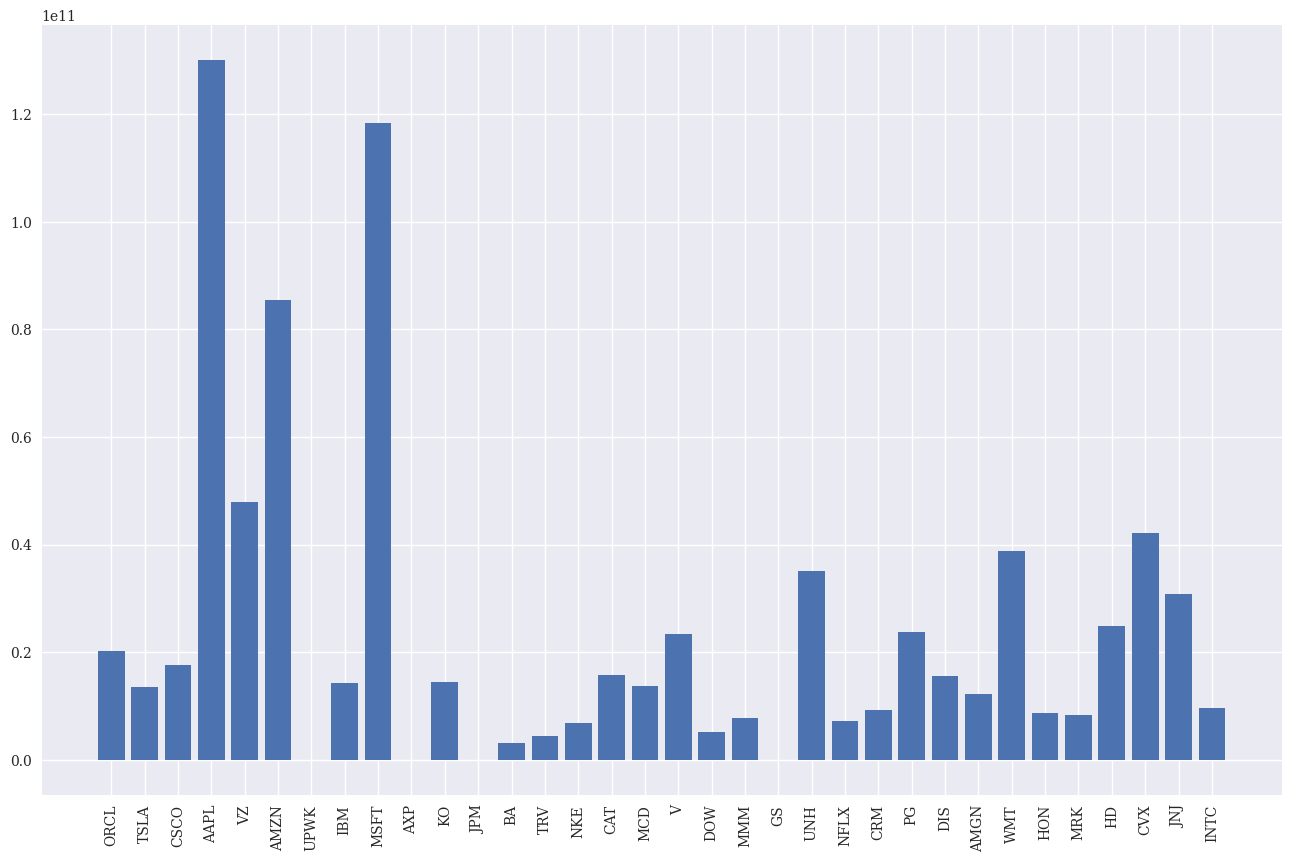

In [72]:
##First let plot out the companies with the biggest ebita
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['ebitda'])
plt.xticks(rotation = 90)
plt.show()

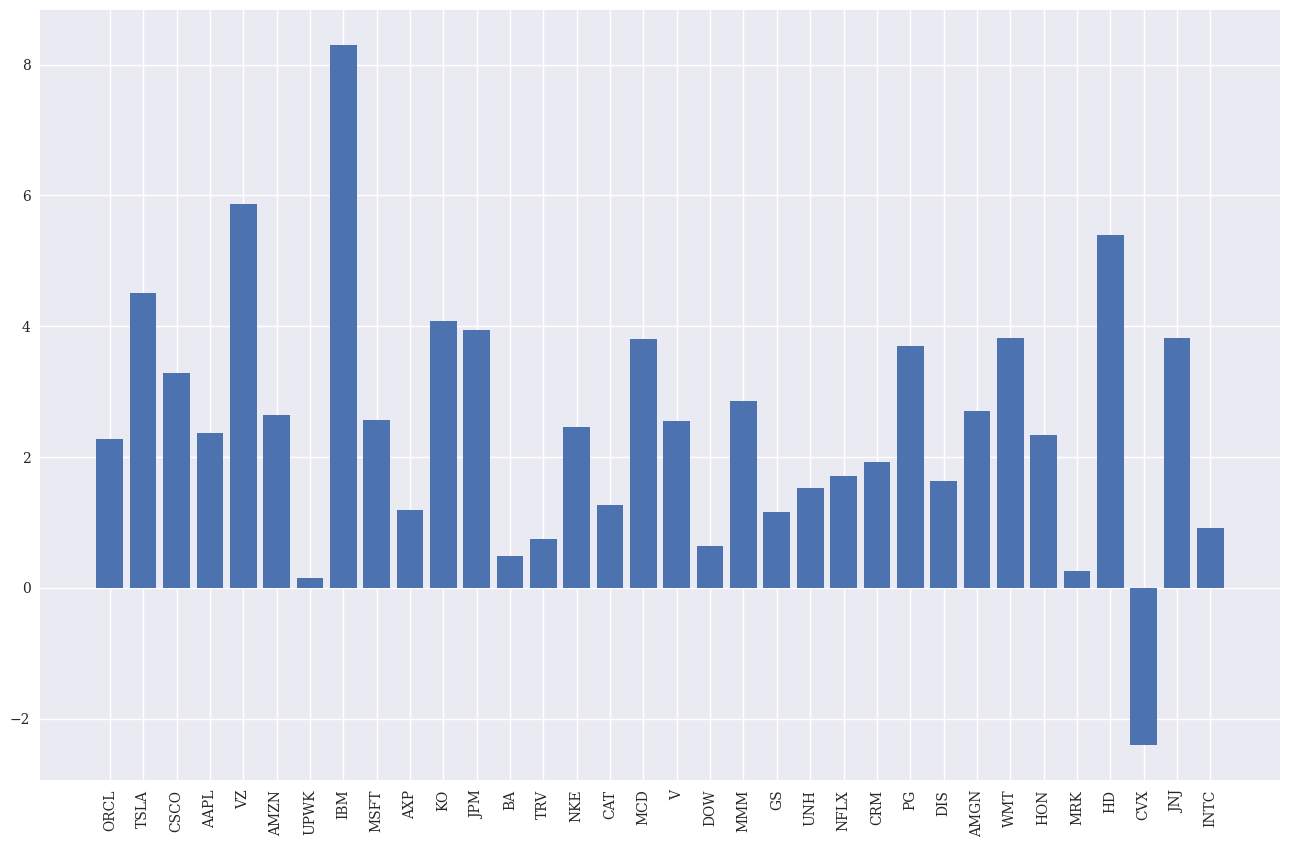

In [73]:
##First let plot out the companies with the biggest pegratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['pegRatio'])
plt.xticks(rotation = 90)
plt.show()

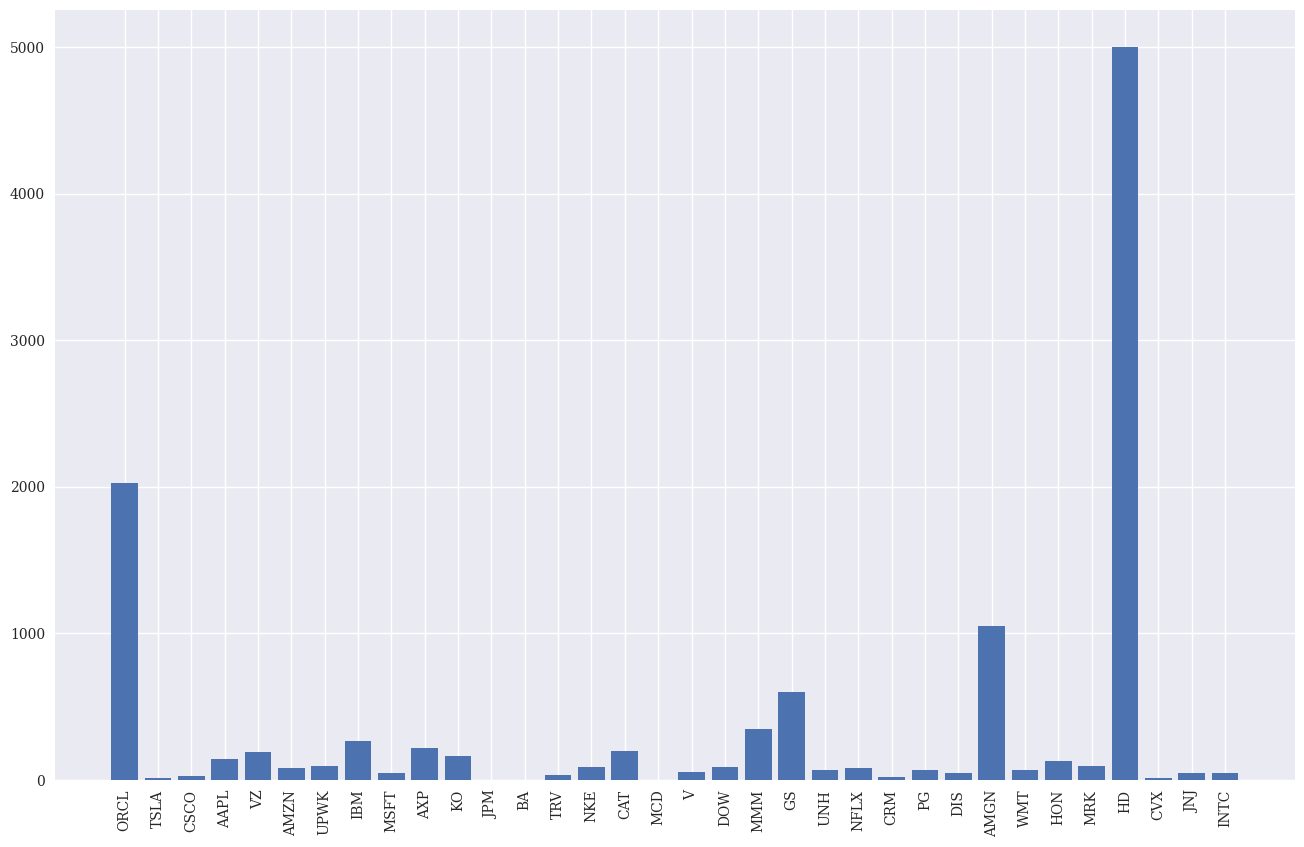

In [74]:
##First let plot out the companies with the biggest debt to equity ratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['debtToEquity'])
plt.xticks(rotation = 90)
plt.show()

Woow Amgen is what you call being leveraged to its tits. Hope this is a data glitch rather than actual leverage.

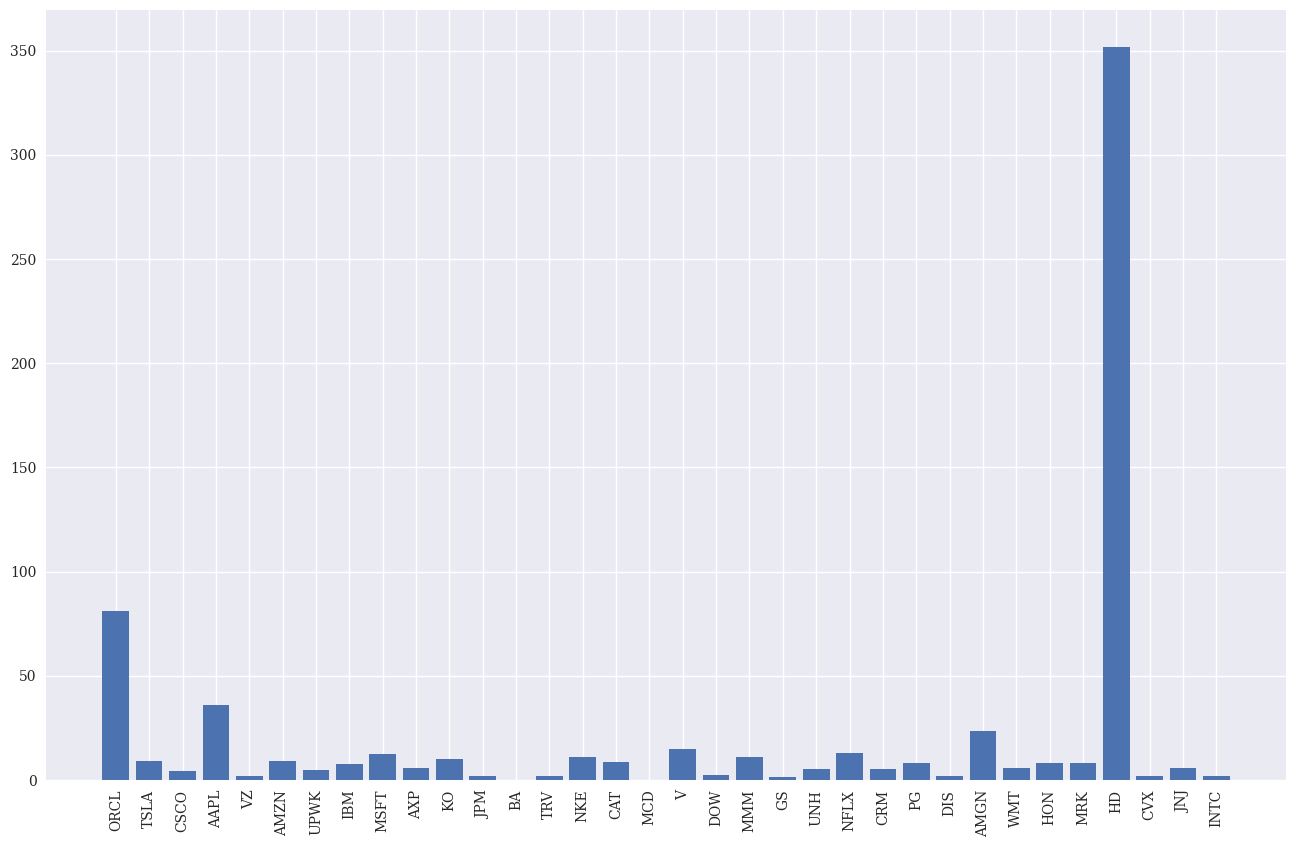

In [75]:
##First let plot out the companies with the biggest price to book ratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['priceToBook'])
plt.xticks(rotation = 90)
plt.show()

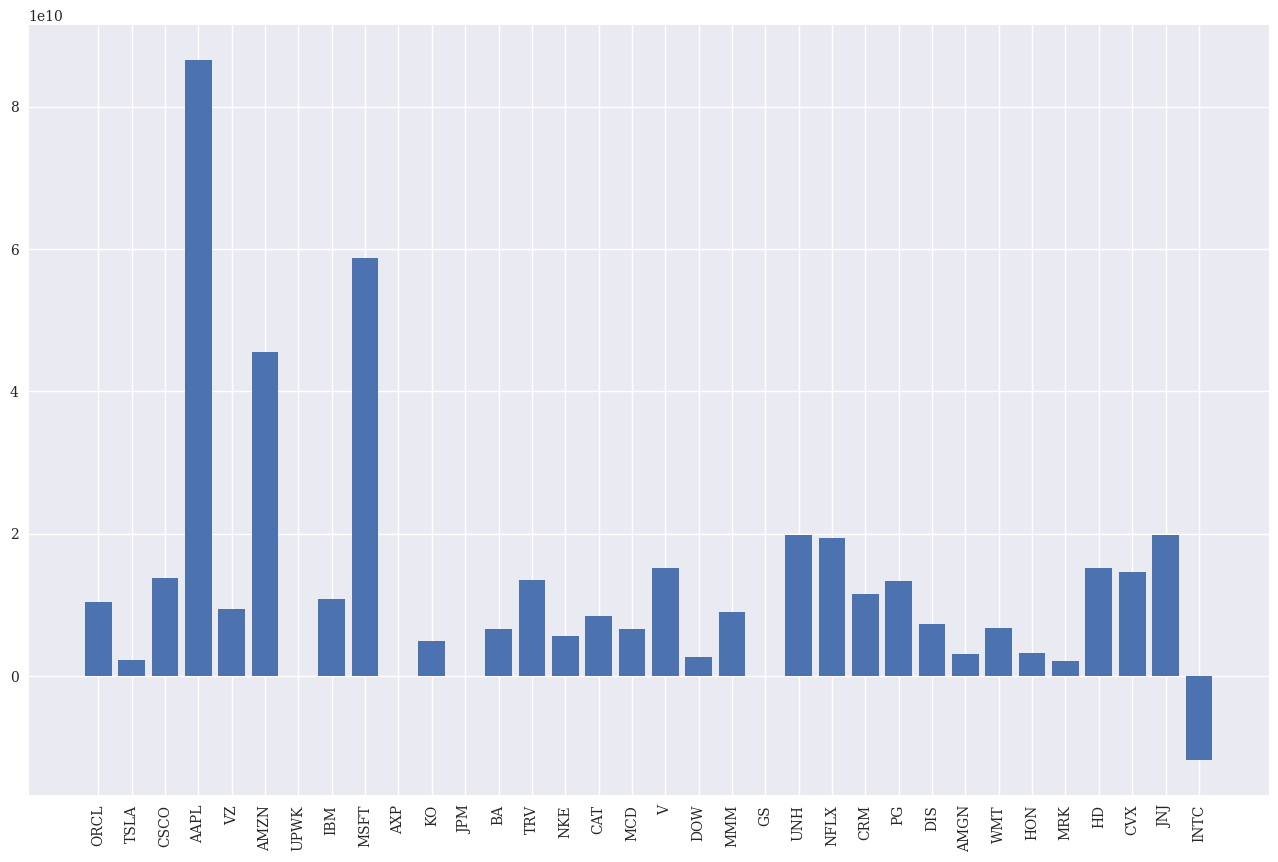

In [76]:

##First let plot out the companies with the biggest price to book ratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['freeCashflow'])
plt.xticks(rotation = 90)
plt.show()

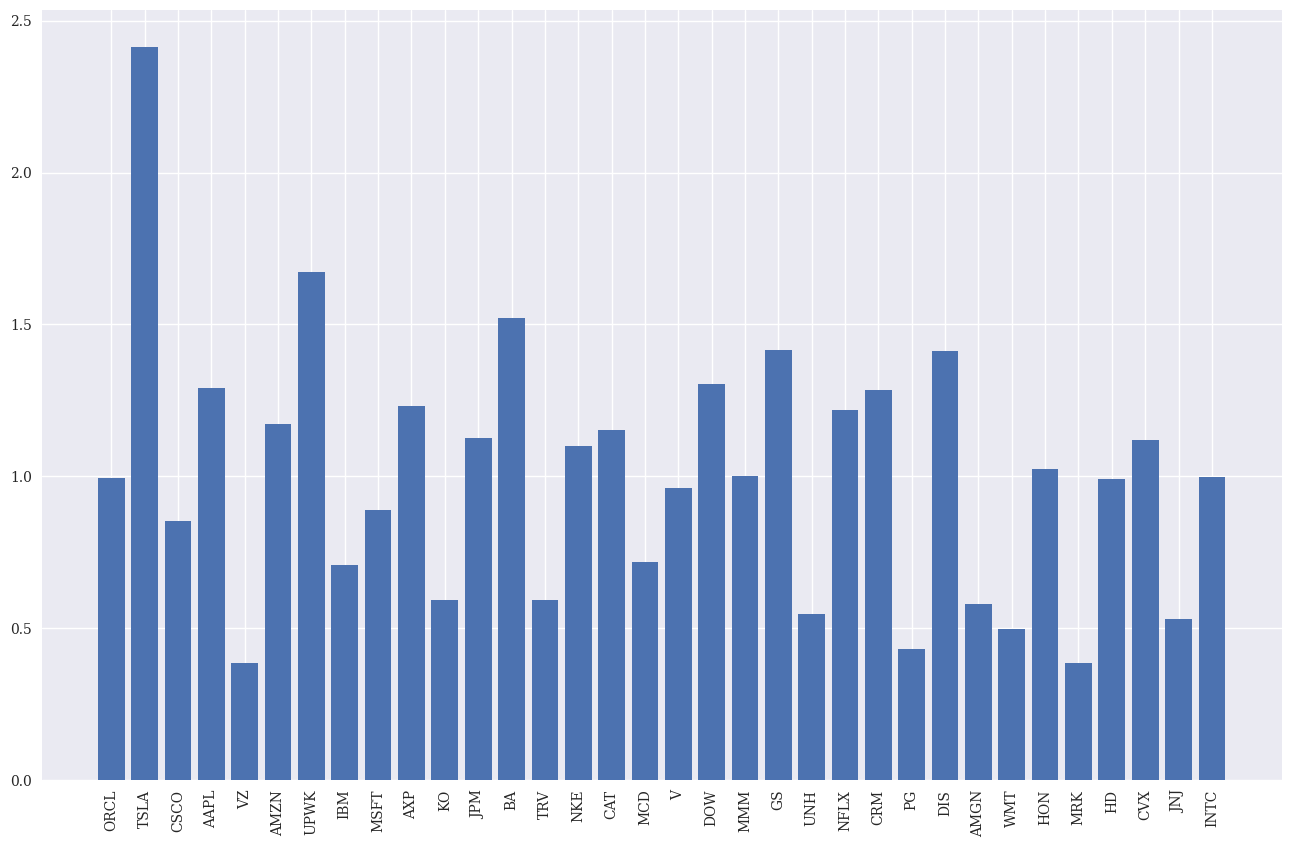

In [77]:
##First let plot out the companies with the biggest price to book ratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['beta'])
plt.xticks(rotation = 90)
plt.show()

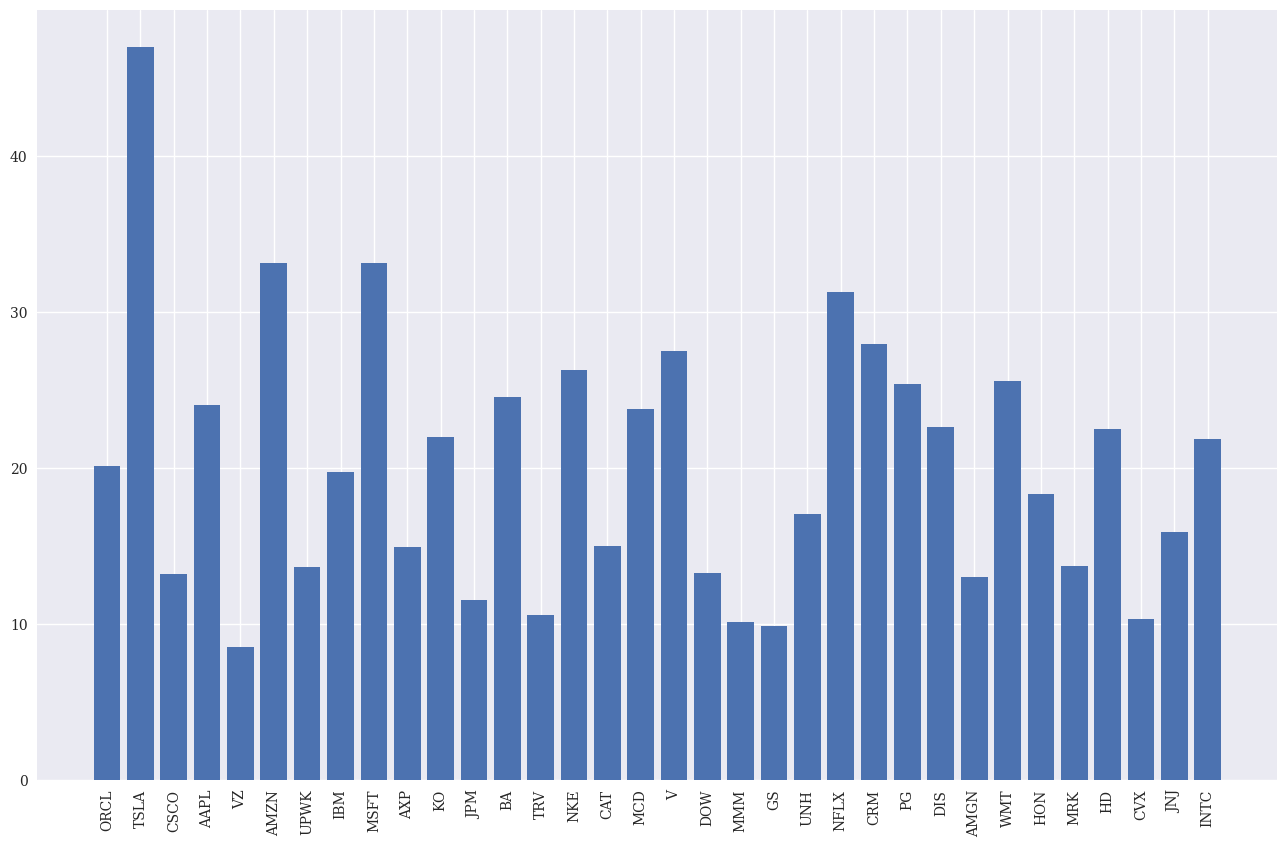

In [78]:

plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['forwardPE'])
plt.xticks(rotation = 90)
plt.show()

## Balance sheet analysis and scoring stocks based on Piotroski F-score.

### What Is the Piotroski Score?

The Piotroski score is a discrete score between zero and nine that reflects nine criteria used to determine the strength of a firm's financial position. The Piotroski score is used to determine the best value stocks, with nine being the best and zero being the worst.

In [79]:
import yahoo_fin.stock_info as yfi
import time
# import yahoofinance as yf

In [80]:
balance_sheet = []
income_statement = []
cfs = []
years = []
profitability_score = 0
leverage_score = 0
operating_efficiency_score = 0
pe_ratio = 0

In [81]:
summary = pd.DataFrame(columns = ['Ticker', 'PE ratio',
                                  'Profitability', 'Leverage',
                                  'Operating eficiency'])

### Understanding the Piotroski Score

The Piotroski score is broken down into the following categories:
- Profitability
- Leverage, liquidity, and source of funds
- Operating efficiency

Profitability Criteria Include
- Positive net income (1 point)
- Positive return on assets (ROA) in the current year (1 point)
- Positive operating cash flow in the current year (1 point)
- Cash flow from operations being greater than net Income (quality of earnings) (1 point)

Leverage, Liquidity, and Source of Funds Criteria Include:
- Lower amount of long term debt in the current period, compared to the previous year (decreased leverage) (1 point)
- Higher current ratio this year compared to the previous year (more liquidity) (1 point)
- No new shares were issued in the last year (lack of dilution) (1 point).

Operating Efficiency Criteria Include:
- A higher gross margin compared to the previous year (1 point)
- A higher asset turnover ratio compared to the previous year (1 point)

In [82]:
def get_data(ticker):
    global balance_sheet
    global income_statement
    global cfs
    global years
    ticker = yf.Ticker(ticker)
    balance_sheet = ticker.balance_sheet
    income_statement = ticker.income_stmt
    cfs = ticker.cashflow
    years = balance_sheet.columns

def pe(ticker):
    global pe_ratio
    pe_ratio = yfi.get_quote_table(ticker)['PE Ratio (TTM)']
    if pe_ratio != pe_ratio: #Check if NaN
        pe_ratio = 0   

def profitability():
    global profitability_score
    #Scores #1 and 2 - net income
    net_income = income_statement[years[0]]['Net Income']
    net_income_py = income_statement[years[1]]['Net Income']
    ni_score = 1 if net_income > 0 else 0
    ni_score_2 = 1 if net_income > net_income_py else 0

    #Score #3 - operating cash flow
    op_cf = cfs[years[0]]['Cash Flow From Continuing Operating Activities']
    op_cf_score = 1 if op_cf > 0 else 0

    #Score #4 - change in RoA
    avg_assets = (balance_sheet[years[0]]['Total Assets']
                    + balance_sheet[years[1]]['Total Assets']) / 2
    avg_assets_py = (balance_sheet[years[1]]['Total Assets']
                    + balance_sheet[years[2]]['Total Assets']) / 2
    RoA = net_income / avg_assets
    RoA_py = net_income_py / avg_assets_py
    RoA_score = 1 if RoA > RoA_py else 0

    #Score #5 - Accruals
    total_assets = balance_sheet[years[0]]['Total Assets']
    accruals = op_cf / total_assets - RoA
    ac_score = 1 if accruals > 0 else 0

    profitability_score = ni_score + ni_score_2 + op_cf_score + RoA_score + ac_score

def leverage():
    global leverage_score
    #Score #6 - long-term debt ratio
    try:
        lt_debt = balance_sheet[years[0]]['Long Term Debt']
        total_assets = balance_sheet[years[0]]['Total Assets']
        debt_ratio = lt_debt / total_assets
        debt_ratio_score = 1 if debt_ratio < 0.4 else 0
    except:
        debt_ratio_score = 1

    #Score #7 - Current ratio
    current_assets = balance_sheet[years[0]]['Current Assets']
    current_liab = balance_sheet[years[0]]['Current Liabilities']
    current_ratio = current_assets / current_liab
    current_ratio_score = 1 if current_ratio > 1 else 0

    leverage_score = debt_ratio_score + current_ratio_score

def operating_efficiency():
    global operating_efficiency_score
    #Score #8 - Gross margin
    gp = income_statement[years[0]]['Gross Profit']
    gp_py = income_statement[years[1]]['Gross Profit']
    revenue = income_statement[years[0]]['Total Revenue']
    revenue_py = income_statement[years[1]]['Total Revenue']
    gm = gp / revenue
    gm_py = gp_py / revenue_py
    gm_score = 1 if gm > gm_py else 0
    
    #Score #9 - Asset turnover
    avg_assets = (balance_sheet[years[0]]['Total Assets']
                    + balance_sheet[years[1]]['Total Assets']) / 2
    avg_assets_py = (balance_sheet[years[1]]['Total Assets']
                    + balance_sheet[years[2]]['Total Assets']) / 2

    at = revenue / avg_assets #at = asset turnover
    at_py = revenue_py / avg_assets_py
    at_score = 1 if at > at_py else 0

    operating_efficiency_score = gm_score + at_score

In [83]:
for ticker in tickers:
    try:
        get_data(ticker)
        pe(ticker)
        profitability()
        leverage()
        operating_efficiency()
        new_row = {'Ticker': ticker,
                    'PE ratio': pe_ratio,
                    'Profitability': profitability_score,
                    'Leverage': leverage_score,
                    'Operating eficiency': operating_efficiency_score}

        summary = summary.append(new_row, ignore_index = True)
        print(ticker + ' added.')
        time.sleep(1)
    except Exception as e:
        print(ticker + ': Something went wrong.')
        print(str(e))
summary['Total score'] = summary['Profitability'] + summary['Leverage'] + summary['Operating eficiency']
summary

c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


ORCL added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


TSLA added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


CSCO added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


AAPL added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


VZ added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


AMZN added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


UPWK added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


IBM added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


MSFT added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


AXP: Something went wrong.
'Current Assets'


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


KO added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


JPM: Something went wrong.
'Current Assets'


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


BA added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


TRV: Something went wrong.
'Current Assets'


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


NKE added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


CAT added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


MCD added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


V added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


DOW added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


MMM added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)


GS: Something went wrong.
'Current Assets'


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


UNH added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


NFLX added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


CRM added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


PG added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


DIS added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


AMGN added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


WMT added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


HON added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


MRK added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


HD added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


CVX added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


JNJ added.


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:295: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = tables[0].append(tables[1])
c:\Users\ishaa\OneDrive\Desktop\PythonProjects\venv\lib\site-packages\yahoo_fin\stock_info.py:302: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(quote_price)
C:\Users\ishaa\AppData\Local\Temp\ipykernel_38784\1862650380.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(new_row, ignore_index = True)


INTC added.


,Ticker,PE ratio,Profitability,Leverage,Operating eficiency,Total score
0,ORCL,31.57,5,0,1,6
1,TSLA,41.56,3,2,0,5
2,CSCO,15.22,5,2,2,9
3,AAPL,26.75,3,1,1,5
4,VZ,14.60,3,1,1,5
5,AMZN,59.67,5,2,1,8
6,UPWK,216.00,4,2,2,8
7,IBM,23.59,5,1,2,8
8,MSFT,36.60,3,2,1,6
9,KO,24.36,5,2,2,9


A company that has Piotroski F-score of 8–9 is considered to be strong. Alternatively, firms achieving the F-score of 0–2 are considered to be weak. 

In [84]:
summary.sort_values(by = 'Total score', ascending = False)

,Ticker,PE ratio,Profitability,Leverage,Operating eficiency,Total score
12,CAT,16.62,5,2,2,9
2,CSCO,15.22,5,2,2,9
18,NFLX,50.14,5,2,2,9
9,KO,24.36,5,2,2,9
19,CRM,73.02,5,2,2,9
24,HON,23.63,4,2,2,8
14,V,32.30,5,2,1,8
5,AMZN,59.67,5,2,1,8
6,UPWK,216.00,4,2,2,8
7,IBM,23.59,5,1,2,8
